# 라이브러리, 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
from matplotlib import rc, font_manager
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [1]:
import os
os.listdir("../3. LOTTO_데이터 및 모델 세이브 파일/data_preprocessing/")

['data1.csv', 'data2.csv', 'data3.csv', 'data4.csv', 'data5.csv', 'data6.csv']

In [3]:
for i, file in enumerate(os.listdir("../3. LOTTO_데이터 및 모델 세이브 파일/data_preprocessing")):
    globals()[f'data{i+1}'] = pd.read_csv("../3. LOTTO_데이터 및 모델 세이브 파일/data_preprocessing/"+file, index_col=0)
    
datas = [data1, data2, data3, data4, data5, data6]

In [23]:
cust = pd.read_csv('../3. LOTTO_데이터 및 모델 세이브 파일/clustering/customer.csv', index_col=0)
cust.columns

Index(['cust', '연간구매금액2', '연간구매금액3', '연간구매금액6', '연간구매금액236', '유통평균주기',
       '제휴평균주기', 'Lpay평균주기', '총합평균주기', 'ma_fem_dv', 'ages', 'zon_hlv',
       'Top5상품', 'Top5상품금액', 'num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02',
       'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06',
       'L00', 'L01', 'how_many_cop', 'online_friendly', 'cltv'],
      dtype='object')

# 파생변수 EDA

## 이용한 계열사 수에 따른 파생변수 관찰
- 'how_many_cop' : 이용한 계열사 수
- 'cltv' : 고객생애가치
- '총합평균주기' : 고객의 구매 주기의 평균
- '연간구매금액236' : 고객이 1년간 구매한 총 금액

고객별로 이용한 계열사 수는 선형적으로 감소한다.

<AxesSubplot:>

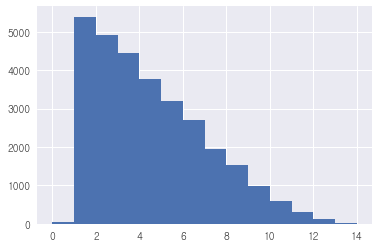

In [24]:
cust.how_many_cop.hist(bins=14)

In [25]:
cust.how_many_cop.value_counts().sort_index()

0.0       39
1.0     5390
2.0     4907
3.0     4441
4.0     3762
5.0     3192
6.0     2692
7.0     1938
8.0     1523
9.0      975
10.0     596
11.0     309
12.0     115
13.0      26
14.0       4
Name: how_many_cop, dtype: int64

In [26]:
total = 0
for i in range(2,14):
    k = cust.how_many_cop.value_counts()[i:].sum()
    total +=k
total

91900

이용한 계열사 수와 연간구매금액이 큰 양의 상관관계를 보이는 것을 확인할 수 있다.

In [27]:
cust.loc[:, ['cltv', 'online_friendly', 'how_many_cop', '연간구매금액236']].corr()

,cltv,online_friendly,how_many_cop,연간구매금액236
cltv,1.000000,-0.020944,0.080748,0.651408
online_friendly,-0.020944,1.000000,0.039932,-0.005817
how_many_cop,0.080748,0.039932,1.000000,0.251652
연간구매금액236,0.651408,-0.005817,0.251652,1.000000


이용한 __계열사 수가 증가__함에 따라 핵심지표인 __고객생애가치가 상승__하는 경향을 확인했다.  
특히 이용한 계열사의 개수가 1개에서 2개가 될 때 큰 고객생애가치의 상승폭을 보였다.  
연간구매금액 역시 선형적으로 증가하는 것을 확인할 수 있었고 고객의 구매 주기는 짧아지는 경향을 확인할 수 있었다.

이를통해 고객이 __여러 개의 계열사를 이용하게 만드는 마케팅 전략__을 구사해야 한다고 판단했다.

<AxesSubplot:title={'center':'이용한 계열사 수에 따른 고객생애가치(평균)'}, xlabel='how_many_cop'>

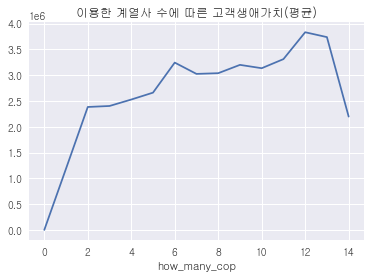

In [28]:
plt.title("이용한 계열사 수에 따른 고객생애가치(평균)")
cust.groupby('how_many_cop')['cltv'].mean().plot()

<AxesSubplot:title={'center':'이용한 계열사 수에 따른 고객생애가치(중앙값)'}, xlabel='how_many_cop'>

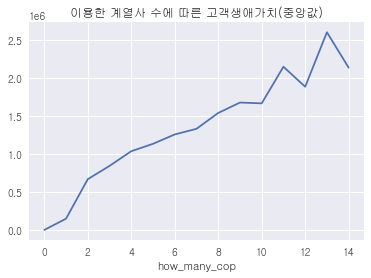

In [29]:
plt.title("이용한 계열사 수에 따른 고객생애가치(중앙값)")
cust.groupby('how_many_cop')['cltv'].median().plot()

<AxesSubplot:title={'center':'이용한 계열사 수에 따른 연간구매금액(평균)'}, xlabel='how_many_cop'>

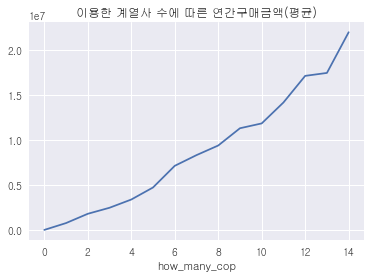

In [30]:
plt.title("이용한 계열사 수에 따른 연간구매금액(평균)")
cust.groupby('how_many_cop')['연간구매금액236'].mean().plot()

<AxesSubplot:title={'center':'이용한 계열사 수에 따른 연간구매금액(중앙값)'}, xlabel='how_many_cop'>

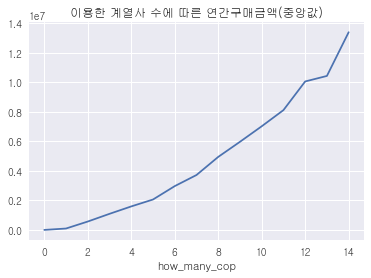

In [31]:
plt.title("이용한 계열사 수에 따른 연간구매금액(중앙값)")
cust.groupby('how_many_cop')['연간구매금액236'].median().plot()

In [32]:
cust.loc[(cust['총합평균주기']=='0번 구매'), '총합평균주기'] = '366 days 00:00:00'
cust.loc[(cust['총합평균주기']=='1번 구매'), '총합평균주기'] = '365 days 00:00:00'
cust.총합평균주기 = cust.총합평균주기.apply(lambda x: int(x.split(' ')[0]))

<AxesSubplot:title={'center':'이용한 계열사 수에 따른 구매주기(평균)'}, xlabel='how_many_cop'>

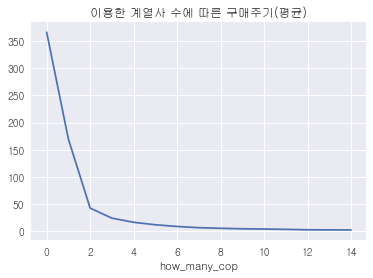

In [33]:
plt.title("이용한 계열사 수에 따른 구매주기(평균)")
cust.groupby('how_many_cop')['총합평균주기'].mean().plot()

<AxesSubplot:title={'center':'이용한 계열사 수에 따른 구매주기(중앙값)'}, xlabel='how_many_cop'>

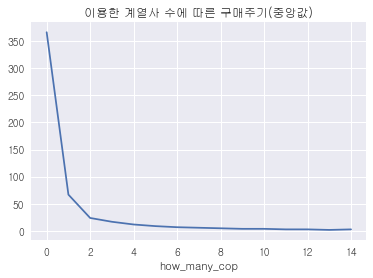

In [34]:
plt.title("이용한 계열사 수에 따른 구매주기(중앙값)")
cust.groupby('how_many_cop')['총합평균주기'].median().plot()

# 상품별 구매주기 EDA

In [100]:
cyc_pur = pd.read_csv('../3. LOTTO_데이터 및 모델 세이브 파일/new/상품별 구매주기.csv', index_col=0)
cyc_pur

,pd_c,구매횟수,구매주기,구매금액,pd_nm,clac_hlv_nm,clac_mcls_nm
0,PD0001,220.0,173.520661,488003460.0,소파,가구,거실가구
1,PD0002,35.0,83.187500,2196100.0,스툴/리빙의자,가구,거실가구
2,PD0003,42.0,101.185185,25679500.0,탁자,가구,거실가구
3,PD0004,15.0,100.416667,5021120.0,장식장/진열장,가구,거실가구
4,PD0005,368.0,155.100000,413431980.0,기타가구,가구,기타가구
...,...,...,...,...,...,...,...
1745,PD1929,616.0,128.036263,122622010.0,여성향수,화장품/뷰티케어,향수
1746,PD1930,65.0,216.079060,10508700.0,남성향수,화장품/뷰티케어,향수
1747,PD1931,331.0,123.483090,56615050.0,남녀공용향수,화장품/뷰티케어,향수
1748,PD1932,9.0,121.750000,1437000.0,남성향수세트,화장품/뷰티케어,향수


같은 물품의 재구매는 3~4달 사이에 가장 많이 발생하는 것을 확인할 수 있다.

<AxesSubplot:>

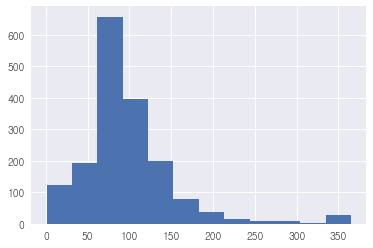

In [101]:
cyc_pur.구매주기.hist(bins=12)

In [102]:
cyc_pur.구매주기.value_counts()

365.000000    26
1.000000      12
4.000000       8
11.000000      3
2.000000       3
              ..
68.011084      1
93.465982      1
134.768939     1
120.225000     1
152.875000     1
Name: 구매주기, Length: 1673, dtype: int64

In [103]:
bins = [0, 60, 90, 120, 180, 366]
labels = ['2달이내', '2달~3달', '3달~4달', '4달~6달', '6달~']
cyc_pur['구매주기_bin'] = pd.cut(cyc_pur['구매주기'], bins, labels=labels, right=False)
cyc_pur['구매주기_bin'].value_counts()

2달~3달    647
3달~4달    404
2달이내     294
4달~6달    294
6달~      111
Name: 구매주기_bin, dtype: int64

In [104]:
cycle_table = pd.pivot_table(data=cyc_pur, index='clac_hlv_nm', columns='구매주기_bin', values='pd_nm' ,aggfunc='count').T
cycle_table

clac_hlv_nm,가구,건강식품,건강용품,건해산물,계절가전,공구/안전용품,과일,과자,구기/필드스포츠,기타(비상품),...,축산물,출산/육아용품,침구/수예,커피/차,컴퓨터,테넌트/음식점,패션잡화,퍼스널케어,헬스/피트니스,화장품/뷰티케어
구매주기_bin,,,,,,,,,,,,,,,,,,,,,
2달이내,7,6,3,2,2,2,22,1,12,1,...,13,5,6,3,3,0,18,2,2,2
2달~3달,3,11,4,15,2,7,28,30,5,3,...,66,9,6,10,4,8,12,3,1,4
3달~4달,5,8,7,7,0,4,3,5,6,1,...,3,5,5,7,3,10,19,26,4,16
4달~6달,3,2,5,3,2,0,3,0,4,0,...,3,3,9,0,4,4,53,6,3,21
6달~,4,2,3,1,7,1,2,0,1,1,...,2,2,5,0,0,0,12,1,0,3


In [105]:
for col in cycle_table.columns:
    cycle_table.loc[:, col] /= cycle_table.loc[:, col].sum()

[]

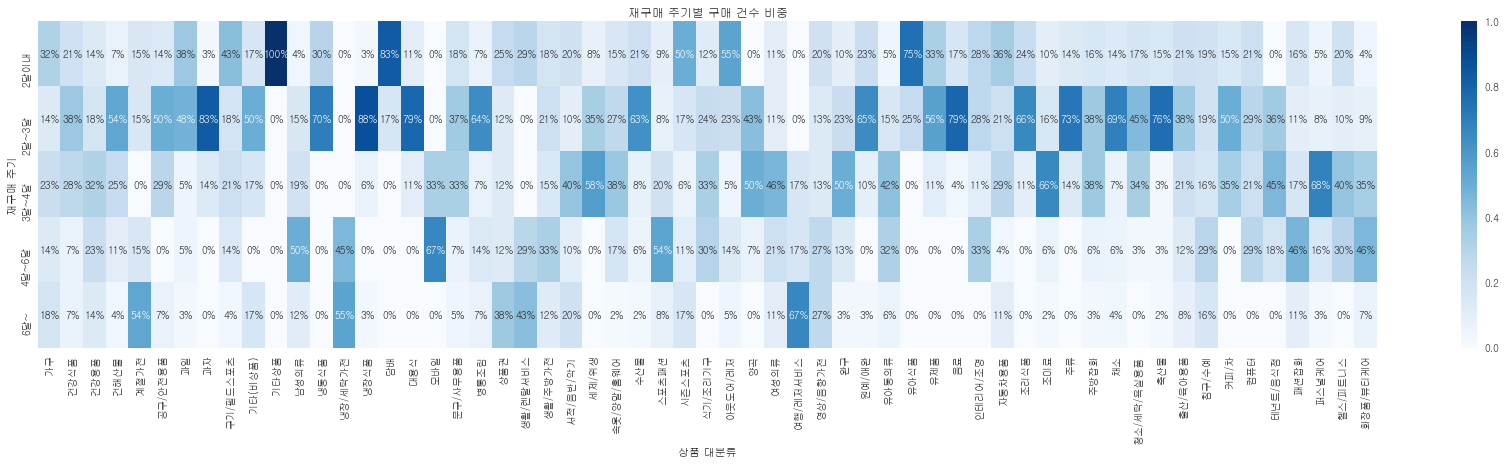

In [106]:
fig = plt.figure(figsize=(30,6))
fig.set_facecolor('white')
sns.heatmap(cycle_table, cmap='Blues', annot=True, fmt=".0%")
plt.title('재구매 주기별 구매 건수 비중')
plt.xlabel('상품 대분류')
plt.ylabel('재구매 주기')
plt.plot()

In [133]:
df24 = pd.merge(data2, data4, on='pd_c', how='left')
총구매금액 = df24.groupby('clac_hlv_nm')['buy_am'].sum()
재구매금액 = cyc_pur.groupby('clac_hlv_nm')['구매금액'].sum()
재구매금액비율 = 재구매금액/총구매금액

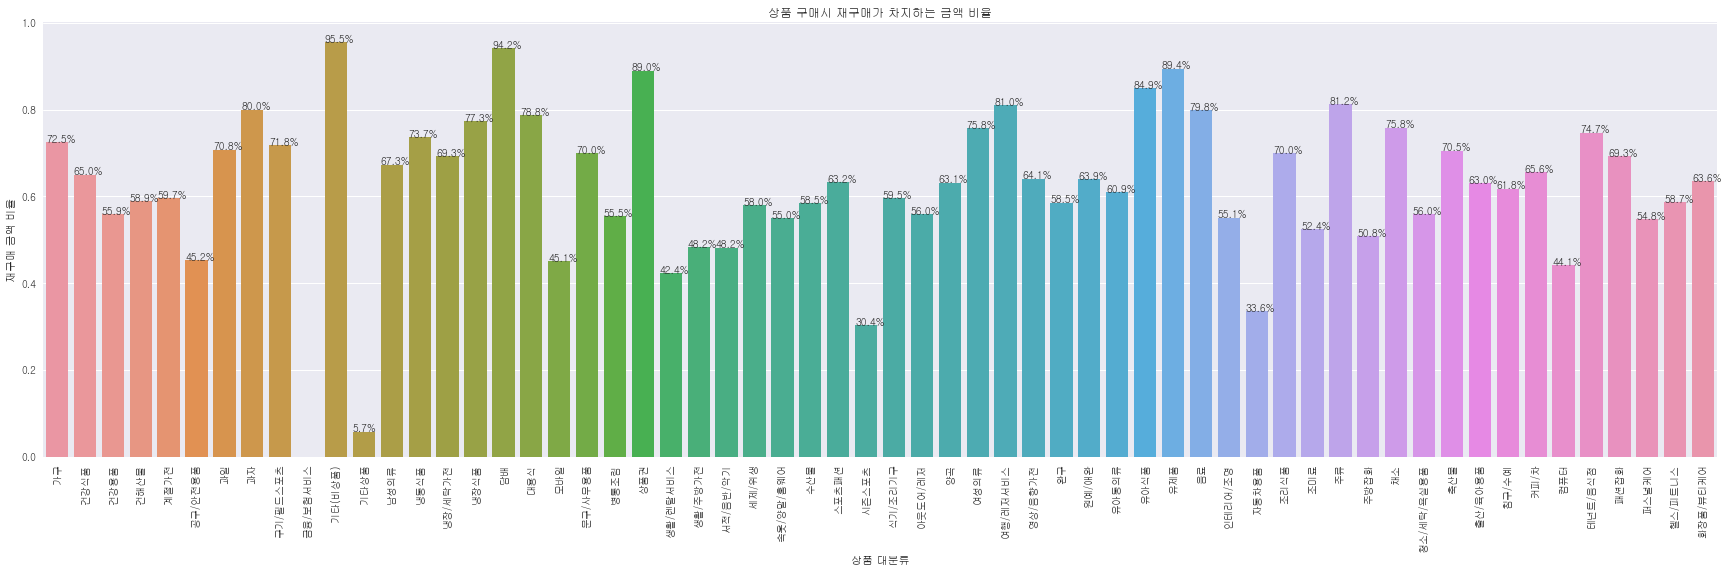

In [182]:
plt.figure(figsize=(30, 8))
ax = sns.barplot(재구매금액비율.index, 재구매금액비율.values)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height())
    x = p.get_x()
    y = p.get_height()
    ax.annotate(percentage, (x, y))
    
plt.title('상품 구매시 재구매가 차지하는 금액 비율')
plt.xlabel('상품 대분류')
plt.xticks(rotation=90)
plt.ylabel('재구매 금액 비율')
plt.show()

# 클러스터링 EDA

In [183]:
cust=pd.read_csv('../3. LOTTO_데이터 및 모델 세이브 파일/clustering/clustering_0.1.csv',index_col=0)
cust.head()

In [6]:
cust.columns

Index(['cust', '연간구매금액2', '연간구매금액3', '연간구매금액6', '연간구매금액236', '유통평균주기',
       '제휴평균주기', 'Lpay평균주기', '총합평균주기', 'ma_fem_dv', 'ages', 'zon_hlv',
       'Top5상품', 'Top5상품금액', 'num_pur2', 'num_pur3', 'num_pur6', 'A01', 'A02',
       'A03', 'A04', 'A05', 'B01', 'C01', 'C02', 'D01', 'D02', 'E01', 'A06',
       'L00', 'L01', 'how_many_cop', 'online_friendly', 'cltv', 'pur6_bin',
       'cluster'],
      dtype='object')

In [185]:
cust['ma_fem_dv']=cust['ma_fem_dv'].replace(['남성','여성'],[0, 1])
cust['ages']=cust['ages'].replace(['20대','30대','40대','50대','60대','70대'],[2,3,4,5,6,7])

In [186]:
cust1=pd.DataFrame(cust.groupby(['cluster'])['how_many_cop','cltv','연간구매금액2', '연간구매금액3', '연간구매금액6', '연간구매금액236','num_pur2', 'num_pur3', 'num_pur6','ages','ma_fem_dv'].mean()).reset_index()
cust1

,cluster,how_many_cop,cltv,연간구매금액2,연간구매금액3,연간구매금액6,연간구매금액236,num_pur2,num_pur3,num_pur6,ages,ma_fem_dv
0,0,5.807789,2.377454e+06,5.378910e+06,4.335563e+05,1.924072e+06,5.812466e+06,216.824121,17.032663,32.467337,3.788317,0.731784
1,1,3.798091,1.368942e+06,1.473869e+06,1.305671e+05,6.919733e+04,1.604436e+06,82.059471,7.987518,3.138767,3.616006,0.489721
2,2,2.765942,6.748563e+06,5.529746e+06,1.007148e+05,1.698559e+05,5.630461e+06,43.829348,2.690580,0.440580,4.311594,0.784783
3,3,1.493883,1.185693e+06,2.104855e+05,5.148661e+04,6.447638e+03,2.619721e+05,2.770287,2.995755,0.020974,3.955306,0.596005
4,4,5.287531,3.874098e+06,4.035631e+06,3.086875e+05,3.207379e+05,4.344318e+06,64.985234,13.223544,2.420427,3.476620,0.714110
5,5,2.565605,1.110401e+06,2.200826e+06,2.074337e+04,2.903645e+04,2.221570e+06,158.285096,0.825732,0.212739,4.449427,0.700892
6,6,2.132231,1.828092e+06,3.514090e+05,9.893026e+04,1.189778e+05,4.503393e+05,5.348332,3.985614,1.033058,3.224671,0.550964
7,7,5.092395,1.808956e+06,4.763863e+06,2.829133e+05,1.454290e+05,5.046776e+06,231.160591,15.481772,1.136078,3.830610,0.717473
8,8,8.829674,3.140911e+06,1.042417e+07,3.578667e+06,6.493479e+06,1.400284e+07,298.046177,75.099924,118.021953,3.776684,0.710825
9,9,3.181597,8.164630e+05,1.883693e+06,7.652181e+04,3.466101e+04,1.960215e+06,187.540332,3.151601,0.389542,4.382651,0.748277


- X축 : 이용한 계열사 수
- Y축 : 고객생애가치
- 원의 크기 : 연간 구매 금액
- 색 : 서로 다른 클러스터

이용한 계열사 수가 증가함에 따라 고객생애가치와 연간 구매 금액이 동시에 증가하는 것을 확인할 수 있음

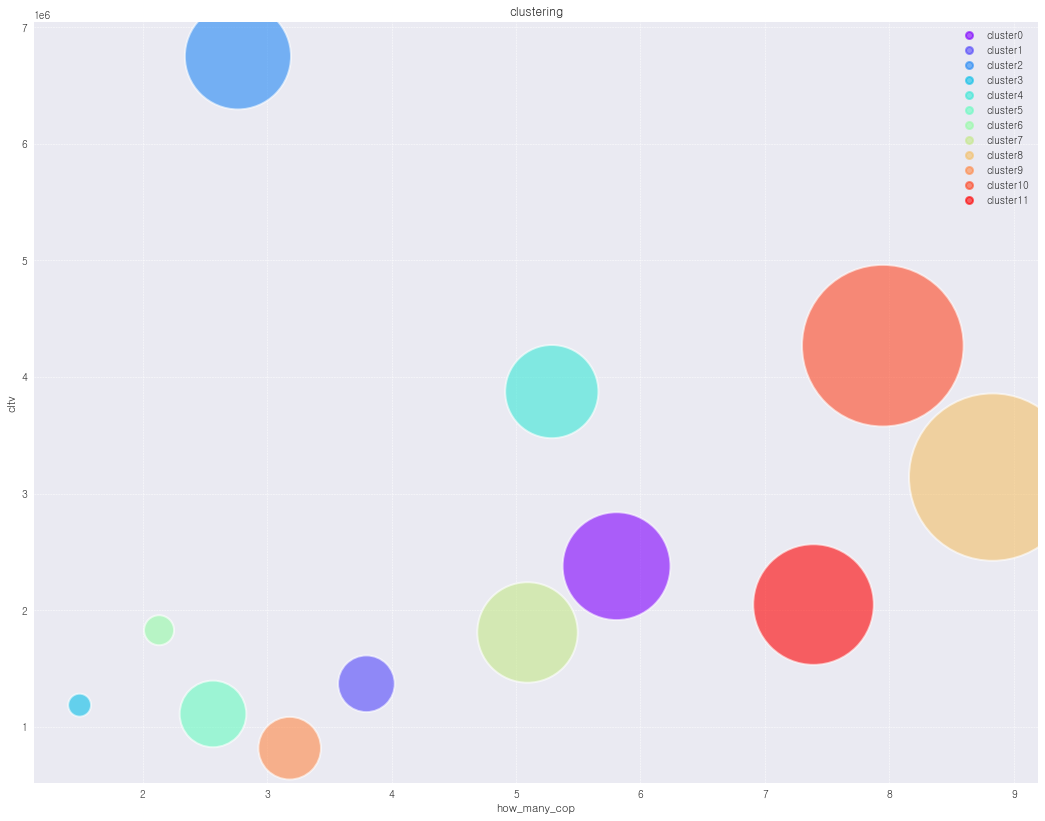

In [187]:
data = cust1
data['cluster']=pd.Categorical(data['cluster']) 
 
fig = plt.figure(figsize=(18,14))
fig.set_facecolor('white')
 
ax=plt.scatter(
    x = data['how_many_cop'], 
    y = data['cltv'], 
    s=data['연간구매금액236']/500, 
    c=data['cluster'].cat.codes, 
    cmap="rainbow", 
    alpha=0.6, 
    edgecolors="white", 
    linewidth=2)

plt.xlabel('how_many_cop')
plt.ylabel('cltv')
plt.title('clustering')
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
## setting legend using colors in matplotlib scatter plot
plt.legend(
    handles=ax.legend_elements()[0], 
    labels=['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4','cluster5','cluster6','cluster7','cluster8','cluster9','cluster10','cluster11'])
plt.show()

- X축 : 이용한 계열사 수
- Y축 : 고객생애가치
- 원의 크기 : LPAY 이용횟수
- 색 : 서로 다른 클러스터

LPAY를 자주 이용하게 된다면 이용횟수는 이용하는 계열사 수도 많아짐

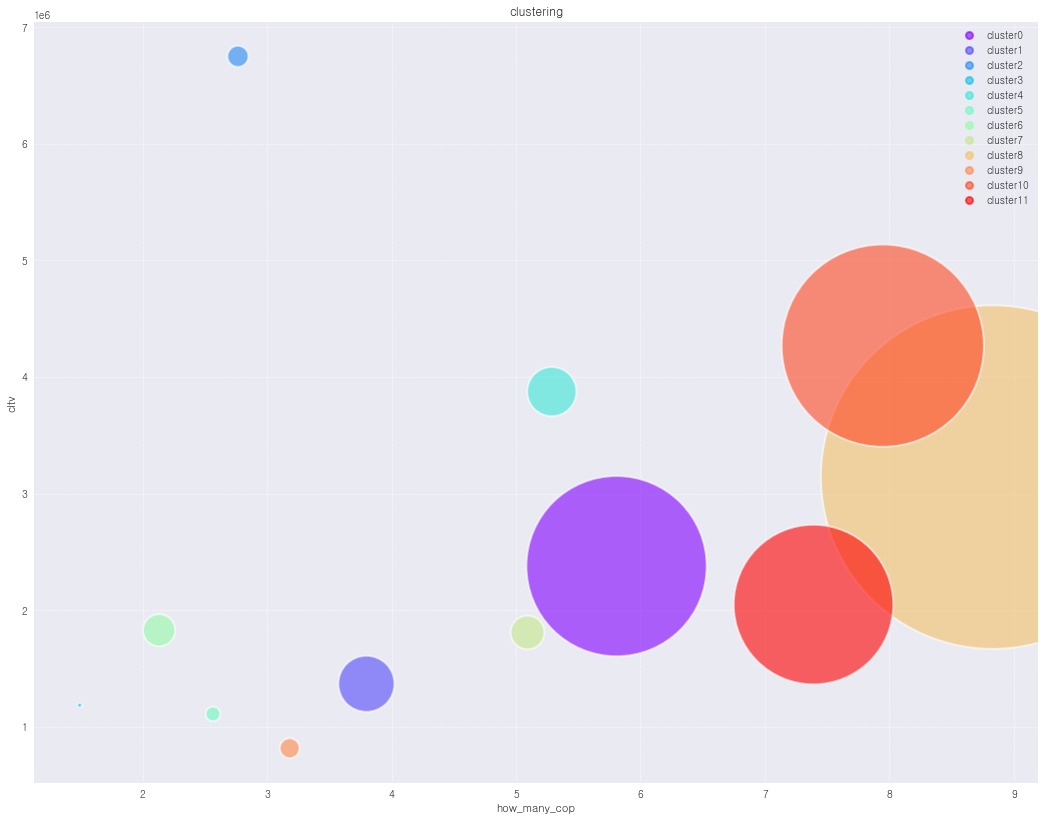

In [188]:
data = cust1
data['cluster']=pd.Categorical(data['cluster']) 
 
fig = plt.figure(figsize=(18,14))
fig.set_facecolor('white')
 
ax=plt.scatter(
    x = data['how_many_cop'], 
    y = data['cltv'], 
    s=data['num_pur6']*1000, 
    c=data['cluster'].cat.codes, 
    cmap="rainbow", 
    alpha=0.6, 
    edgecolors="white", 
    linewidth=2)

plt.xlabel('how_many_cop')
plt.ylabel('cltv')
plt.title('clustering')
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
## setting legend using colors in matplotlib scatter plot
plt.legend(
    handles=ax.legend_elements()[0], 
    labels=['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4','cluster5','cluster6','cluster7','cluster8','cluster9','cluster10','cluster11'])
plt.show()

- X축 변수가 클수록 여성비율이 높음  
- Y축 변수가 클수록 나이대 평균

3040 여성에 여러 클러스터가 모여있음을 확인할 수 있음

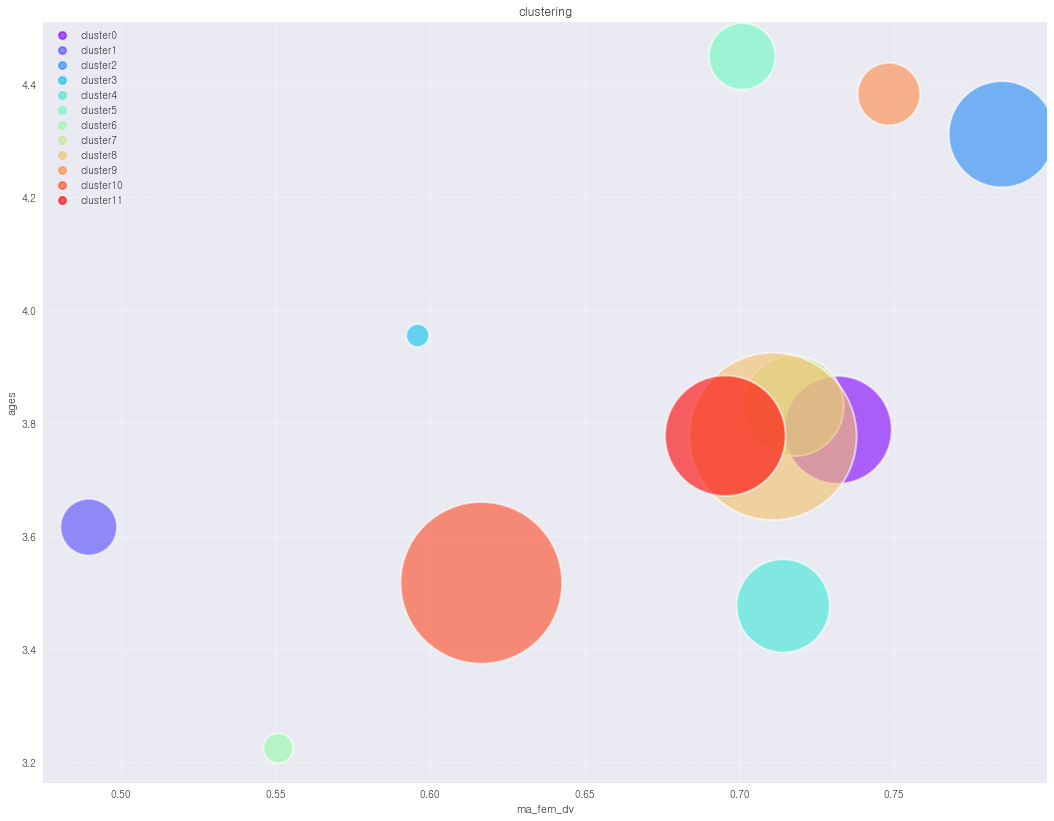

In [190]:
data = cust1
data['cluster']=pd.Categorical(data['cluster']) 

fig = plt.figure(figsize=(18,14))
fig.set_facecolor('white')
 
ax=plt.scatter(
    x = data['ma_fem_dv'], 
    y = data['ages'], 
    s=data['연간구매금액236']/500, 
    c=data['cluster'].cat.codes, 
    cmap="rainbow", 
    alpha=0.6, 
    edgecolors="white", 
    linewidth=2)

plt.xlabel('ma_fem_dv')
plt.ylabel('ages')
plt.title('clustering')
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
## setting legend using colors in matplotlib scatter plot
plt.legend(
    handles=ax.legend_elements()[0], 
    labels=['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4','cluster5','cluster6','cluster7','cluster8','cluster9','cluster10','cluster11'])
plt.show()